Prathamesh Ingale

# Practical 2.4

## Aim:
Introduction to Python Programming: Seaborn
## Theory:
Seaborn is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is designed to work well with data frames from Pandas, making it an excellent choice for exploratory data analysis and data visualization tasks.

Seaborn simplifies the process of creating visually appealing plots by providing a wide range of built-in plot types and offering numerous customization options. It includes functions for creating univariate and bivariate plots, categorical plots, distribution plots, and more. Seaborn's default settings are aesthetically pleasing, but it also allows for easy customization of plot aesthetics, including colors, styles, and fonts.

Under the hood, Seaborn leverages Matplotlib to create the plots. It adds an additional layer of functionality and abstraction on top of Matplotlib, making it easier to generate complex plots with concise code. Seaborn also integrates well with other Python libraries like Pandas and NumPy, allowing for seamless data manipulation and analysis in conjunction with plotting.

In summary, Seaborn is a powerful data visualization library that simplifies the creation of visually appealing statistical plots. It provides a high-level interface, extensive customization options, and seamless integration with other Python libraries, making it a popular choice among data scientists and analysts.

In [2]:
import seaborn as sns_prathamesh
%matplotlib inline

In [3]:
tips = sns_prathamesh.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distplot
Seaborn's `distplot` function is a versatile tool for visualizing the distribution of a univariate dataset. It combines a histogram with a kernel density estimate (KDE) plot, providing a comprehensive representation of the data's distribution. The histogram displays the frequency or count of data points within each bin, while the KDE plot estimates the underlying probability density function. `distplot` is particularly useful for assessing the shape, spread, and central tendency of the data, as well as identifying potential outliers or skewness. It also supports various customization options, allowing you to modify the appearance of the plot, such as changing the color, adjusting the bandwidth of the KDE, and incorporating rug plots to display individual data points along the x-axis. Additionally, `distplot` can handle different types of data, including continuous, discrete, and mixed variables, making it a versatile and powerful tool for distribution analysis.

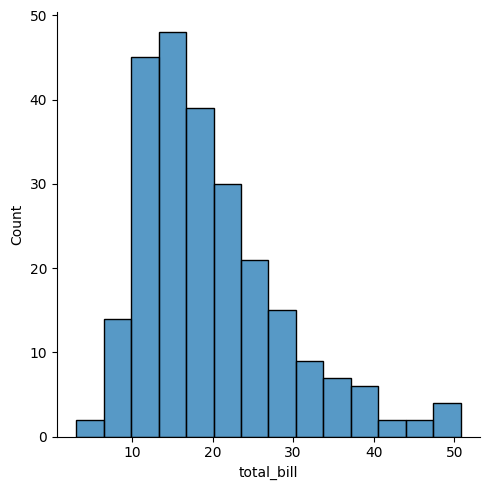

In [6]:
sns_prathamesh.displot(tips['total_bill'])

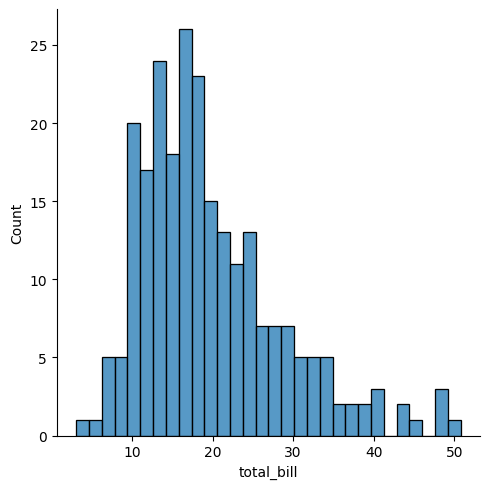

In [7]:
sns_prathamesh.displot(tips['total_bill'],kde=False,bins=30)

## Jointplot

Seaborn's `jointplot` function is a powerful visualization tool that combines multiple plots to explore the relationship between two numeric variables. It provides a comprehensive analysis of the joint distribution, including scatter plots, histograms, kernel density estimates, and correlation coefficients. The scatter plot displays the relationship between the variables, while the histograms on the top and right sides show the individual distributions. Additionally, `jointplot` incorporates a kernel density estimate to visualize the density of the data points. It also calculates and displays the correlation coefficient to quantify the strength and direction of the relationship. `jointplot` offers several customization options to enhance the plot, such as changing the color palette, adding regression lines, and incorporating hexbins for better representation of dense data. This function is widely used for exploring bivariate relationships and understanding the joint behavior of variables in a dataset, making it a valuable tool for data analysis and visualization.

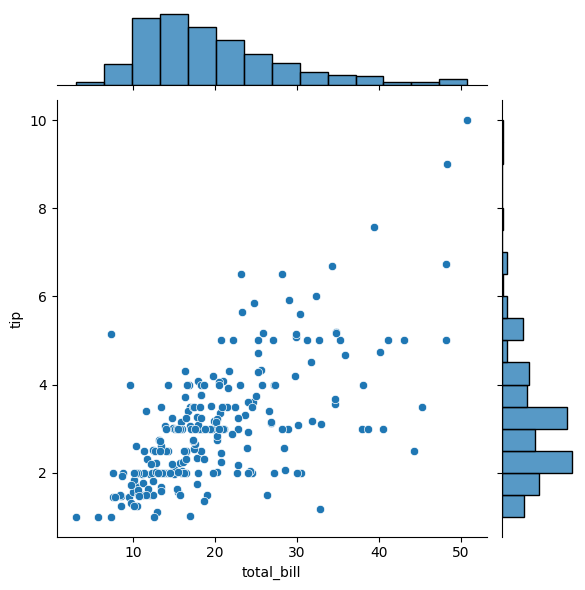

In [8]:
sns_prathamesh.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

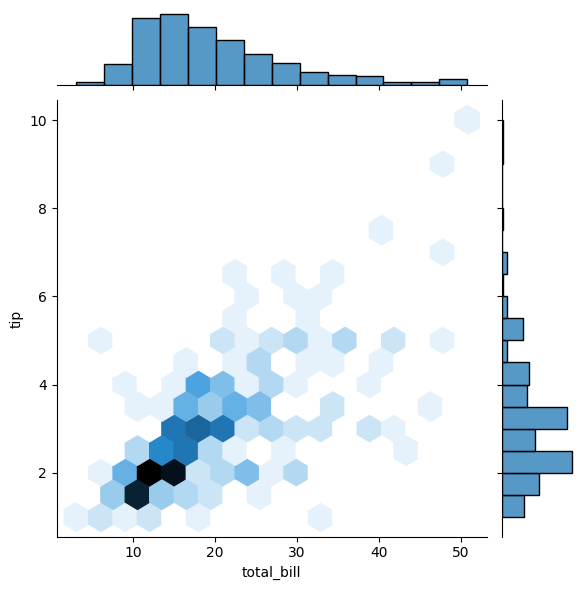

In [8]:
sns_prathamesh.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

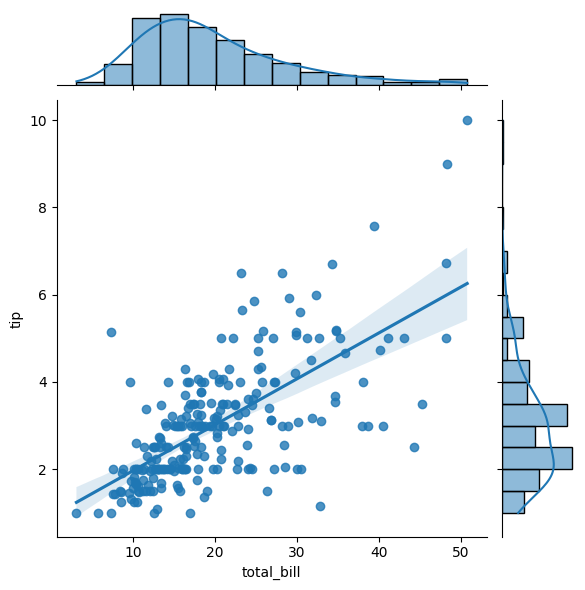

In [9]:
sns_prathamesh.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## Pairplot

Seaborn's `pairplot` function is a versatile tool for creating a grid of scatter plots and histograms to visualize the pairwise relationships between multiple variables in a dataset. It provides a quick and comprehensive way to explore the correlations, distributions, and patterns across different combinations of variables. Each cell of the grid represents the relationship between two variables, with scatter plots showcasing the bivariate relationship and histograms displaying the univariate distributions. By default, the diagonal cells show the kernel density estimates of the variables. `pairplot` is particularly useful for gaining insights into the overall structure of the data, identifying potential outliers or clusters, and assessing the strength and direction of relationships between variables. It also supports additional customization options, allowing you to modify the appearance of the plots, add regression lines, incorporate categorical hue variables, and more. `pairplot` is a valuable tool in exploratory data analysis and pattern discovery.



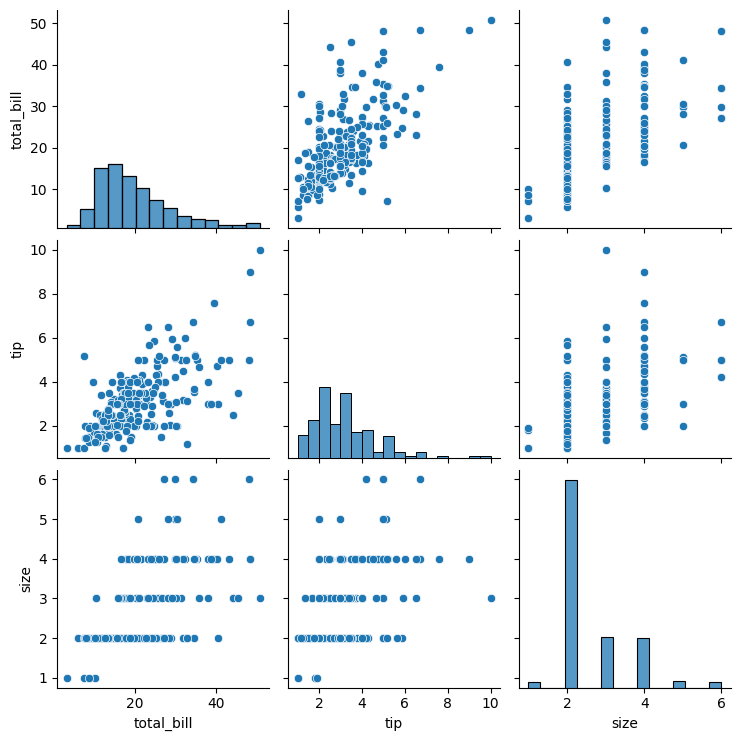

In [10]:
sns_prathamesh.pairplot(tips)

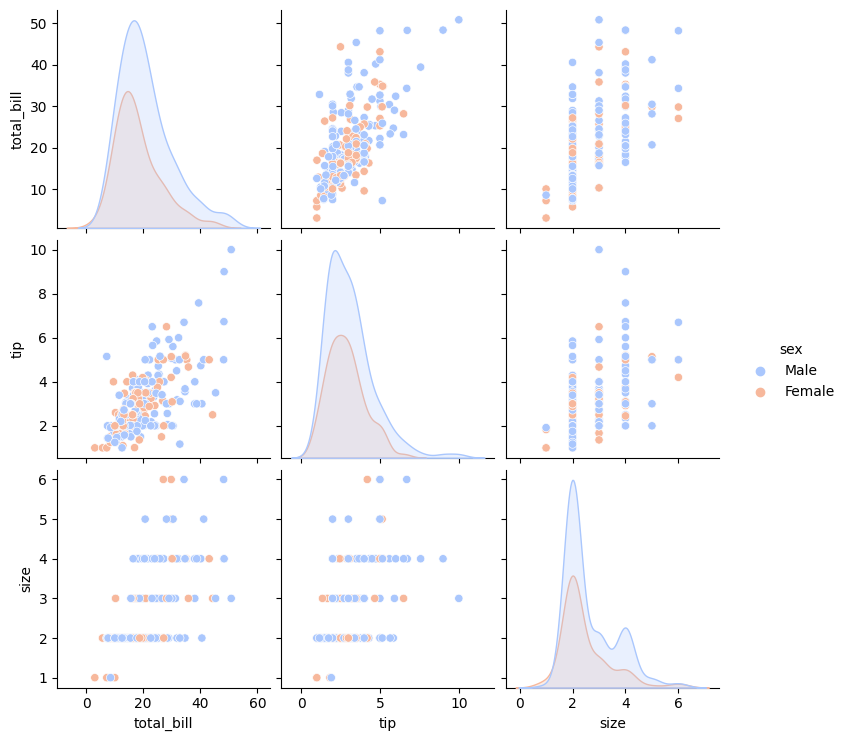

In [11]:
sns_prathamesh.pairplot(tips, hue='sex', palette='coolwarm')

## Rugplot
Seaborn's `rugplot` function is a simple yet informative tool for visualizing the distribution of a univariate dataset on a number line. It creates small vertical lines or "ticks" along the axis to represent the individual data points. Rug plots are especially useful for examining the density and distribution of data points, particularly in combination with other plots such as kernel density estimates or histograms. They provide a clear visual representation of the data's distribution, including gaps, clusters, and outliers. `rugplot` can be used as a standalone plot or as an additional layer in combination with other plot types. It offers customization options to adjust the appearance of the rug ticks, such as changing their color, size, and orientation. Rug plots are commonly used in exploratory data analysis and can provide valuable insights into the underlying distribution of a variable.

<Axes: xlabel='total_bill'>

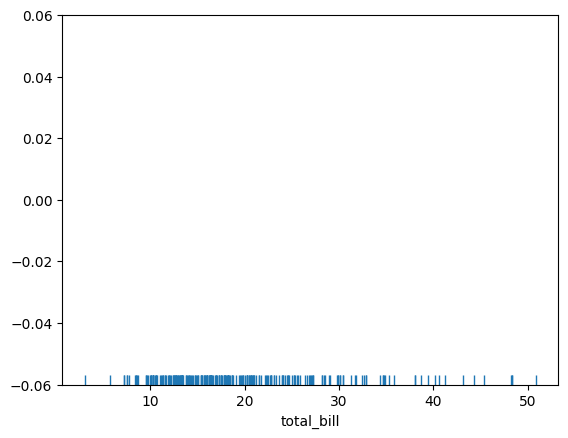

In [12]:
sns_prathamesh.rugplot(tips['total_bill'])

(0.0, 1.0)

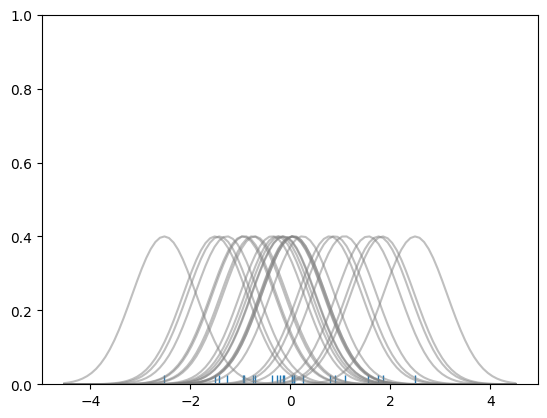

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
dataset = np.random.randn(25)
sns_prathamesh.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

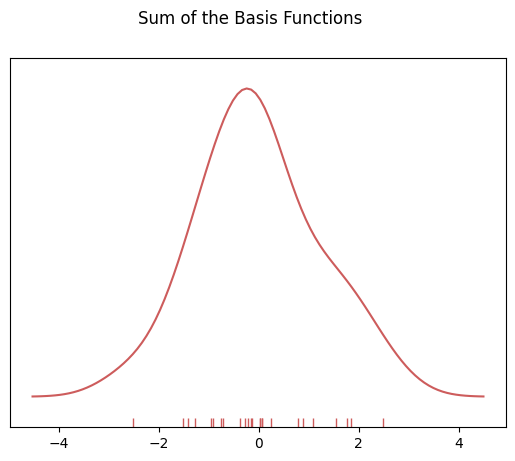

In [16]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns_prathamesh.rugplot(dataset,c='indianred')
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

## KDEplot
The `kdeplot` function in Seaborn is a powerful tool for visualizing the estimated probability density function of a univariate or bivariate dataset using kernel density estimation (KDE). It provides a smooth and continuous representation of the underlying distribution, allowing for a more detailed analysis of the data compared to traditional histograms. 

With `kdeplot`, you can create density plots that showcase the shape, central tendency, and spread of the data. It employs a non-parametric approach, using a kernel function to estimate the density at each point and aggregating these estimates to form a smooth curve. The bandwidth parameter controls the smoothness of the estimate, influencing the trade-off between capturing small-scale features and oversmoothing the data.

`kdeplot` supports various customization options, such as choosing different kernel functions, adjusting the bandwidth, incorporating a hue variable for visual grouping, and displaying the cumulative distribution function (CDF). It can handle univariate, bivariate, and even multivariate data, making it a versatile tool for exploring and visualizing the distribution of data in a concise and informative manner.

### KDEplot with other plots

Using kdeplot in combination with another plot can provide valuable insights by complementing and enhancing the understanding of the data.
 - Rugplot:  A kdeplot can be overlaid on a rug plot, where the rug plot shows the individual data points along the x-axis, while the kdeplot provides a smooth estimation of the density. This combination allows for a more detailed understanding of the data's distribution, highlighting areas of high density, gaps, or outliers.
 - Distplot: A kdeplot can be added to a distplot to display the underlying distribution of the data. This combination is particularly useful for assessing the shape, spread, and central tendency of the data, as well as identifying potential outliers or skewness.
 - Jointplot: A kdeplot can be added to a jointplot to visualize the joint distribution of two variables. This combination is especially useful for exploring bivariate relationships and understanding the joint behavior of variables in a dataset.
 - Pairplot: A kdeplot can be added to a pairplot to visualize the pairwise relationships between multiple variables. This combination is particularly useful for gaining insights into the overall structure of the data, identifying potential outliers or clusters, and assessing the strength and direction of relationships between variables.

<Axes: xlabel='total_bill', ylabel='Density'>

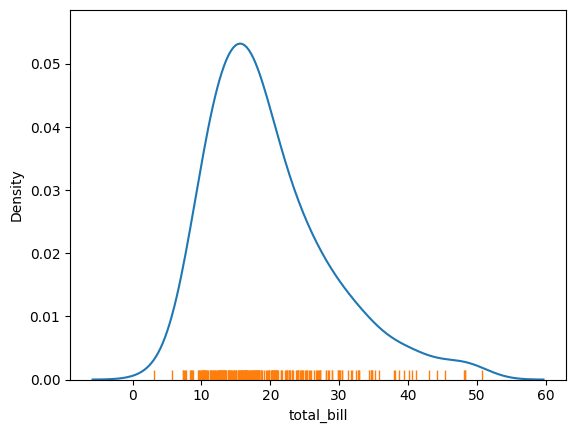

In [17]:
sns_prathamesh.kdeplot(tips['total_bill'])
sns_prathamesh.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

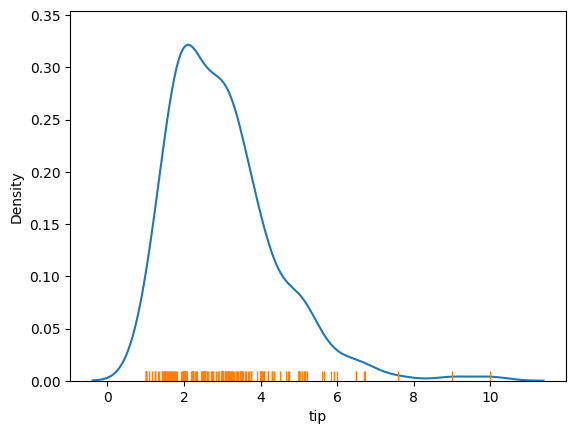

In [18]:
sns_prathamesh.kdeplot(tips['tip'])
sns_prathamesh.rugplot(tips['tip'])

## Categorical Data Plots

 - catplot: Previously known as `factorplot`,
Seaborn's `catplot` function is a versatile visualization tool that allows you to create different types of plots based on the categorical variable. It can be used to create various plots such as bar plots, box plots, and violin plots, depending on the chosen parameters. With `catplot`, you can easily explore the relationship between one or more categorical variables and a numerical variable in your dataset. It provides a convenient way to analyze and compare data across different categories, making it particularly useful for data exploration and presentation. The function also allows for easy customization of the plot aesthetics and supports additional parameters to fine-tune the plot appearance and behavior.

 - boxplot:
The `boxplot` function in Seaborn is a powerful tool for visualizing the distribution of a continuous variable across different categories. It displays the summary statistics of the variable such as the median, quartiles, and outliers in a concise and easy-to-understand manner. Box plots are effective in identifying potential outliers, examining the skewness of the data, and comparing the distribution between multiple categories. Seaborn's `boxplot` function provides several customization options to control the appearance of the plot, including adding color, changing the orientation, and incorporating additional categorical variables for grouping.

 - violinplot:
Seaborn's `violinplot` function combines the features of a box plot and a kernel density plot to provide a comprehensive visualization of the distribution of a continuous variable across different categories. It displays the probability density of the data at various values, offering insights into the shape, spread, and multimodality of the distribution. The width of the violin represents the density at a particular value, while the white dot inside indicates the median. `violinplot` is particularly useful when you want to compare the distributions between different categories and identify potential differences in their shapes or spreads. It also allows for customization options such as changing the color palette, adding individual data points, and grouping with additional categorical variables.

 - stripplot:
The `stripplot` function in Seaborn is used to visualize the distribution of a continuous variable for each category in a dataset. It creates a scatter plot where each data point represents an individual observation, and the positions along the categorical axis correspond to their respective categories. Strip plots are useful for exploring the distribution of data points, identifying potential outliers, and comparing the spread of the variable across categories. Seaborn's `stripplot` function offers several customization options to enhance the plot, such as adding a hue variable to further differentiate the points, adjusting the marker size and shape, and incorporating jitter to avoid overlapping points.

 - swarmplot:
Similar to `stripplot`, the `swarmplot` function in Seaborn is used to visualize the distribution of a continuous variable for each category. However, unlike strip plots, swarm plots automatically adjust the positions of the points along the categorical axis to avoid overlapping. This arrangement provides a clearer representation of the distribution while maintaining the individual data points. Swarm plots are particularly useful when dealing with datasets containing many data points and overlapping values. Seaborn's `swarmplot` function offers options to customize the appearance of the plot, including adding a hue variable for further differentiation, adjusting the marker size and shape, and controlling the order of categories on the categorical axis.

 - barplot:
Seaborn's `barplot` function is a versatile tool for visualizing the relationship between a categorical variable and a numerical variable. It provides a concise representation of the central tendency (usually the mean) of the numeric variable for each category, along with the error bars to indicate the variability or confidence intervals. Bar plots are effective in comparing the values across different categories and identifying potential differences. The function also supports additional parameters to customize the appearance of the plot, such as changing the color palette, adding error caps, and incorporating hue variables for further differentiation. `barplot` is a widely used plot type for summarizing data and communicating insights.

 - countplot:
The `countplot` function in Seaborn is used to visualize the distribution of categorical variables by displaying the frequency or count of each category in a dataset. It provides a straightforward way to understand the distribution and compare the occurrences of different categories. Count plots are particularly useful for identifying the most common categories and exploring the imbalance or skewness in the data. Seaborn's `countplot` function offers various customization options to enhance the plot, such as changing the color palette, adding a hue variable to differentiate the counts further, and controlling the order of categories on the categorical axis. It is a simple yet effective tool for analyzing categorical data and gaining insights into its distribution.

In [19]:
tips = sns_prathamesh.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

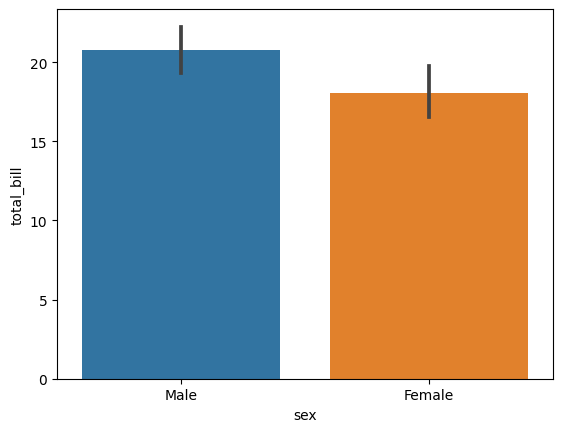

In [20]:
sns_prathamesh.barplot(x='sex',y='total_bill',data=tips)

In [21]:
import numpy as np

### Barplot

<Axes: xlabel='sex', ylabel='total_bill'>

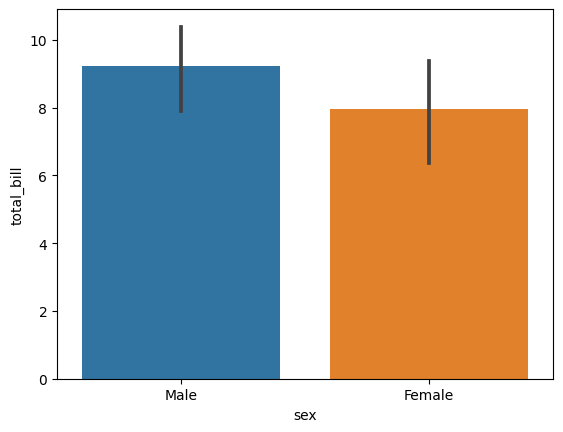

In [22]:
sns_prathamesh.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### Countplot

<Axes: xlabel='sex', ylabel='count'>

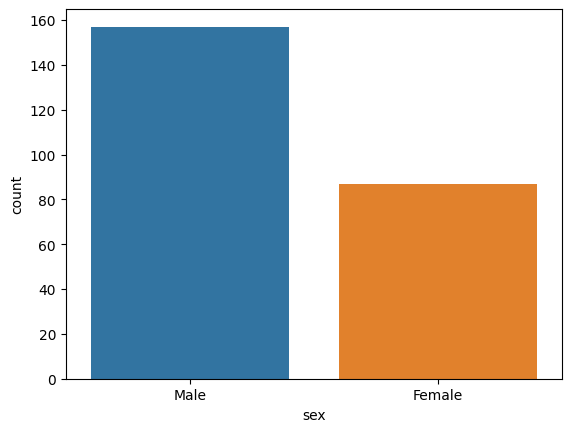

In [24]:
sns_prathamesh.countplot(x='sex',data=tips)

### Boxplot

<Axes: xlabel='day', ylabel='total_bill'>

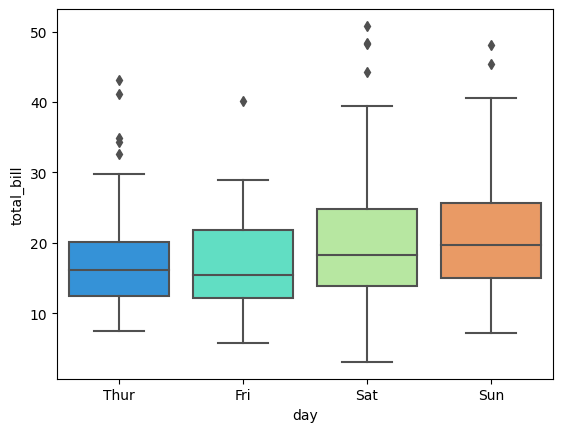

In [27]:
sns_prathamesh.boxplot(x='day',y='total_bill',data=tips, palette='rainbow')

<Axes: >

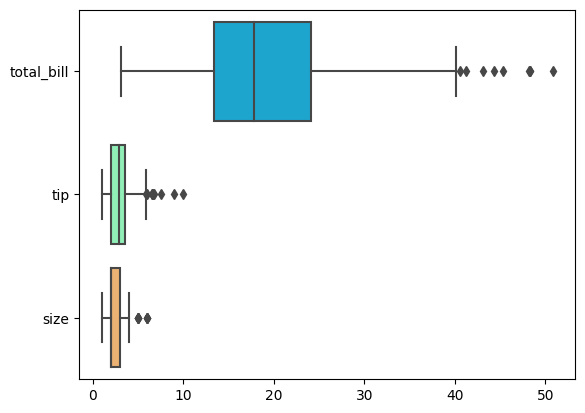

In [28]:
sns_prathamesh.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

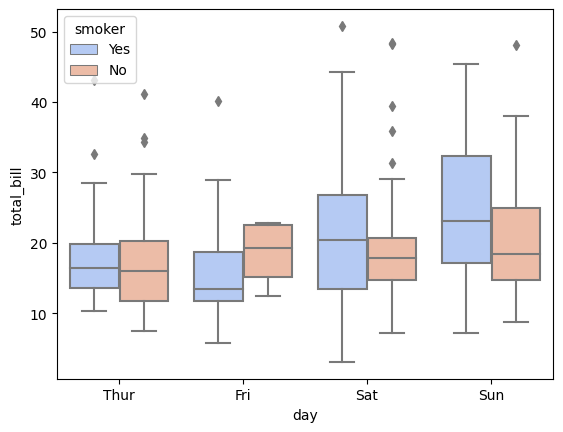

In [29]:
sns_prathamesh.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='coolwarm')

<Axes: xlabel='day', ylabel='total_bill'>

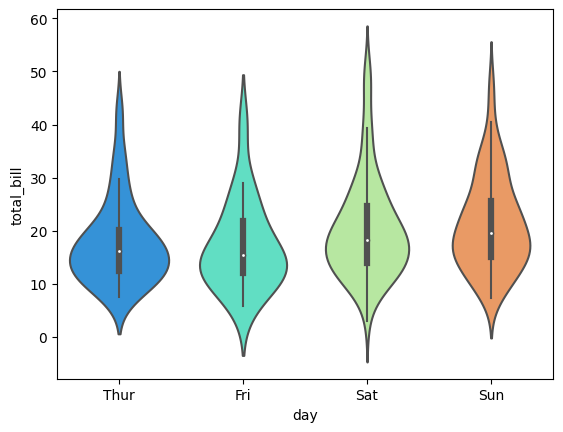

In [30]:
sns_prathamesh.violinplot(x='day',y='total_bill',data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

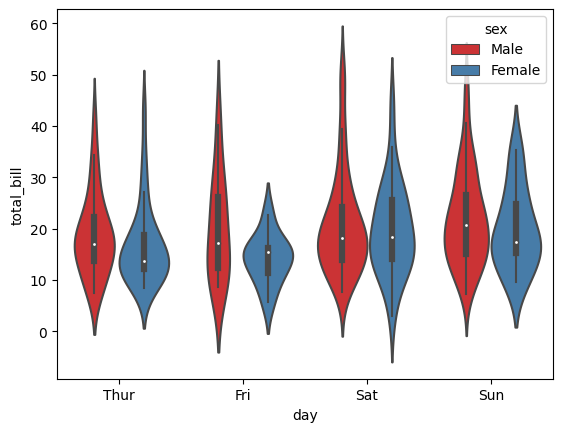

In [31]:
sns_prathamesh.violinplot(x='day',y='total_bill',data=tips,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

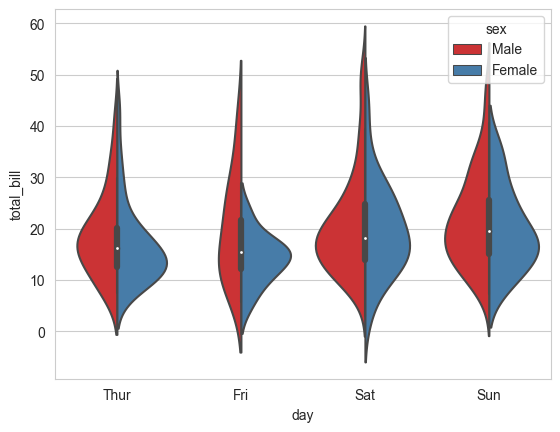

In [26]:
sns_prathamesh.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

### Stripplot and Swarmplot

C:\Users\paxyi\AppData\Local\Temp\ipykernel_11248\2212767063.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

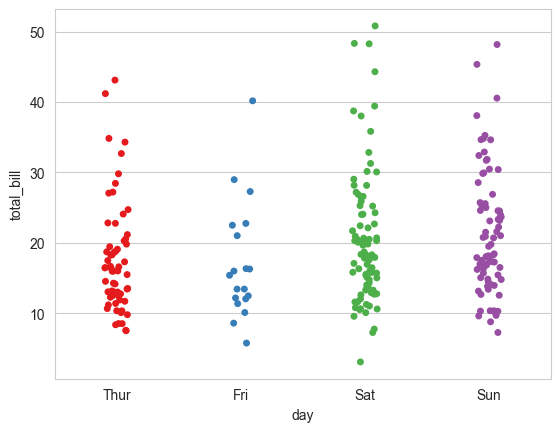

In [24]:
sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,palette='Set1')

C:\Users\paxyi\AppData\Local\Temp\ipykernel_11248\1991619195.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,jitter=True,palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

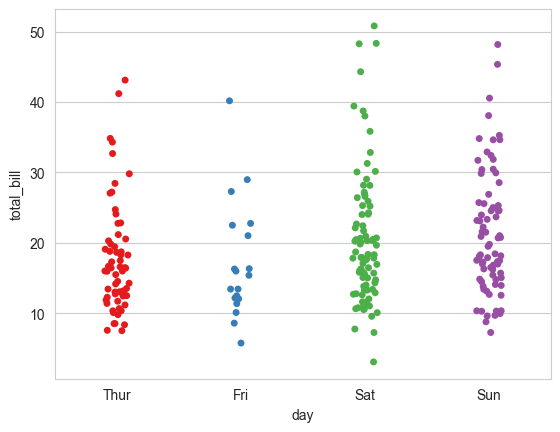

In [23]:
sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,jitter=True,palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

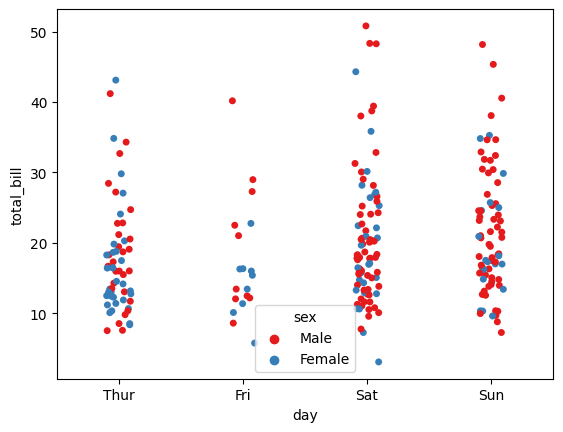

In [38]:
sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

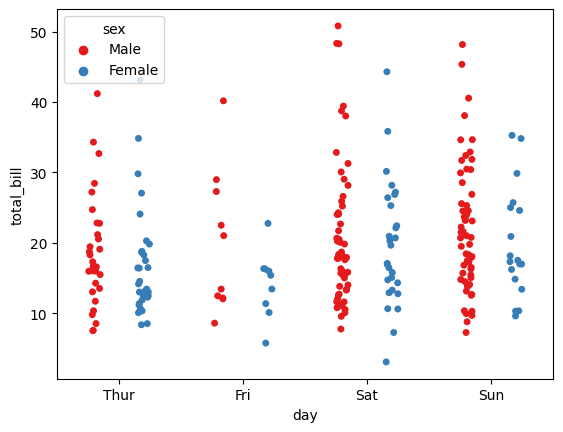

In [44]:
sns_prathamesh.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

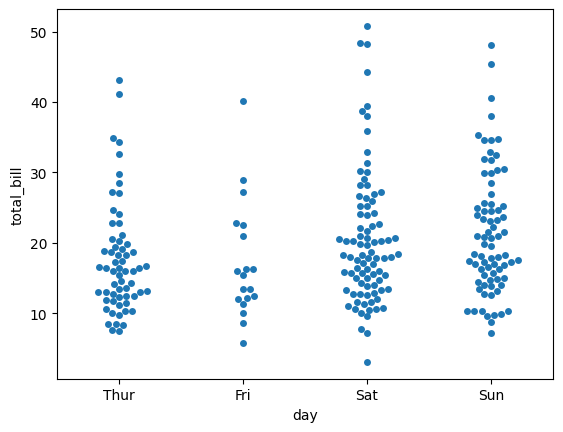

In [41]:
sns_prathamesh.swarmplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

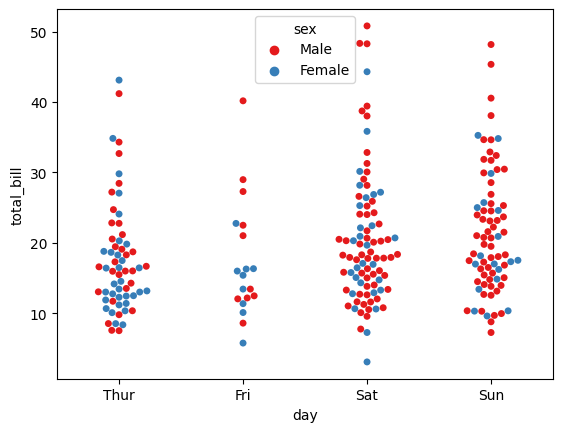

In [43]:
sns_prathamesh.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1")

<Axes: xlabel='tip', ylabel='day'>

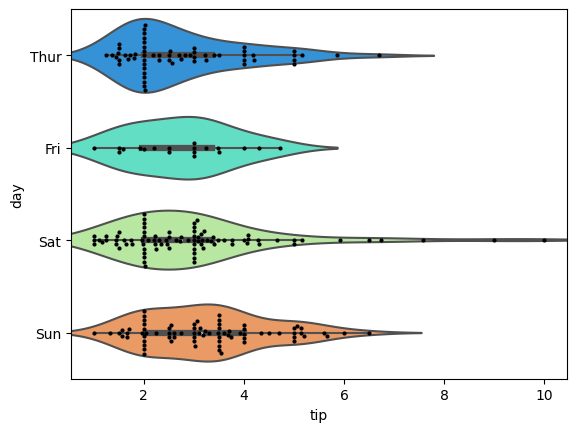

In [45]:
sns_prathamesh.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns_prathamesh.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

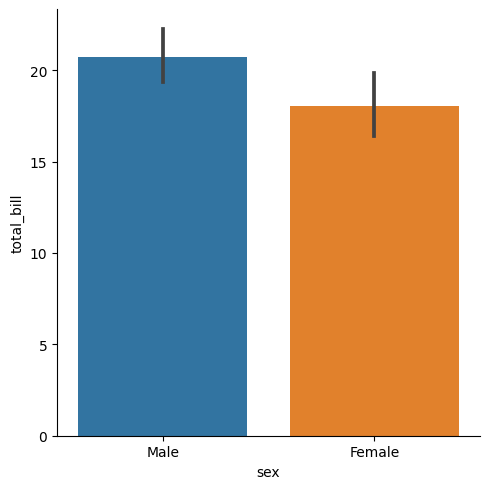

In [47]:
sns_prathamesh.catplot(x='sex',y='total_bill',data=tips,kind='bar')

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data. Seaborn has a variety of plot types to help you quickly and easily visualize these matrices. It is important to note that matrices are typically used to represent 2D data, where each cell contains a single value. However, you can also use matrices to represent 3D data, where each cell contains a vector of values. In this case, the matrix is referred to as a tensor. Seaborn's matrix plots are particularly useful for visualizing the pairwise relationships between multiple variables in a dataset. They are also effective in identifying clusters or groups of similar items, as well as outliers. The plots can be customized to highlight specific areas of interest or to enhance the overall appearance of the plot.

 - Heatmap:
A heatmap is a graphical representation of data where values are depicted using a color scale. It is particularly useful for visualizing matrices or tables of data. The heatmap displays a grid of cells, with each cell colored according to the corresponding value in the dataset. The color gradient in the heatmap provides a visual representation of the relative magnitude of the values. Typically, darker or brighter colors indicate higher or lower values, respectively.
Heatmaps are often employed to reveal patterns, trends, or correlations in the data. They enable the identification of clusters or groups of similar values, as well as outliers. Heatmaps are commonly used in various domains, including data analysis, machine learning, biology, finance, and many others.

 - Clustermap:
A clustermap is a specialized type of heatmap that incorporates hierarchical clustering. Hierarchical clustering is a method that groups similar data points into clusters based on their similarity. In a clustermap, the rows and columns of the heatmap are reordered based on the results of hierarchical clustering. This rearrangement places similar rows and columns close to each other, creating clusters or groups of related items.
The clustermap provides additional insights by visually representing both the similarity between individual data points and the larger-scale patterns of similarity between groups of data points. By observing the clustermap, it becomes easier to identify clusters or branches in the hierarchical structure of the data.

In [48]:
flights = sns_prathamesh.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [49]:
tips = sns_prathamesh.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heatmap



In [51]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

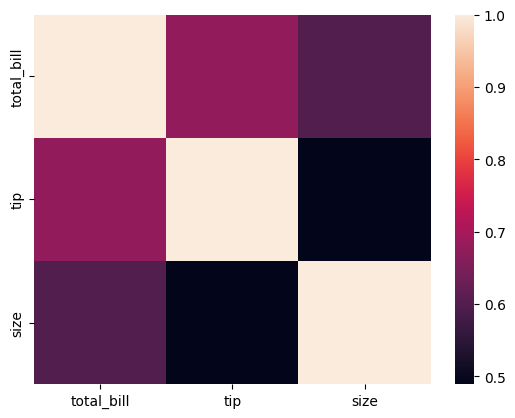

In [52]:
sns_prathamesh.heatmap(tips.corr(numeric_only=True))

<Axes: >

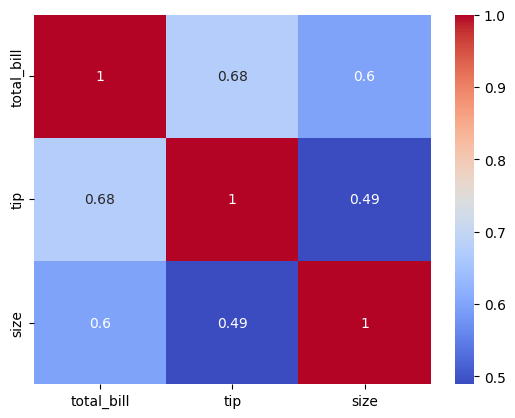

In [53]:
sns_prathamesh.heatmap(tips.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [54]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

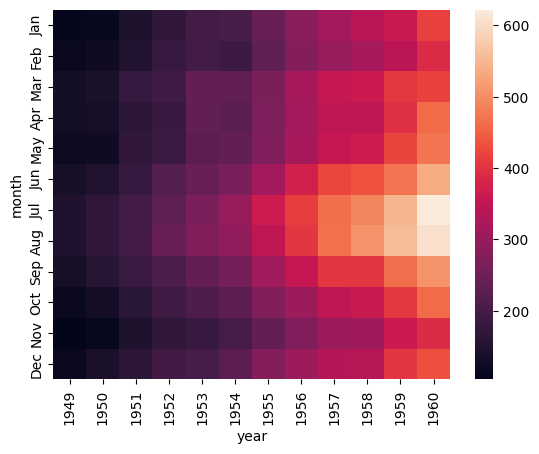

In [55]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns_prathamesh.heatmap(pvflights)

<Axes: xlabel='year', ylabel='month'>

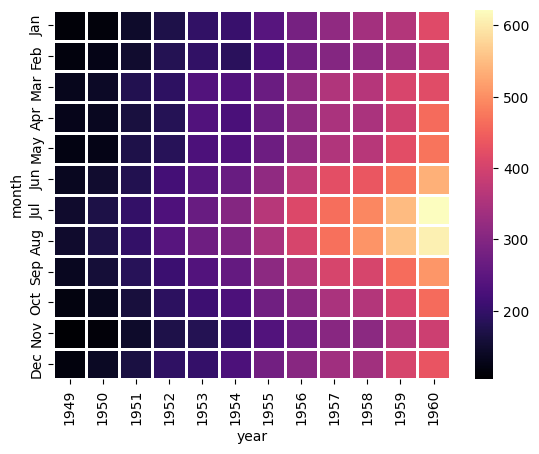

In [56]:
sns_prathamesh.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

Clustermap

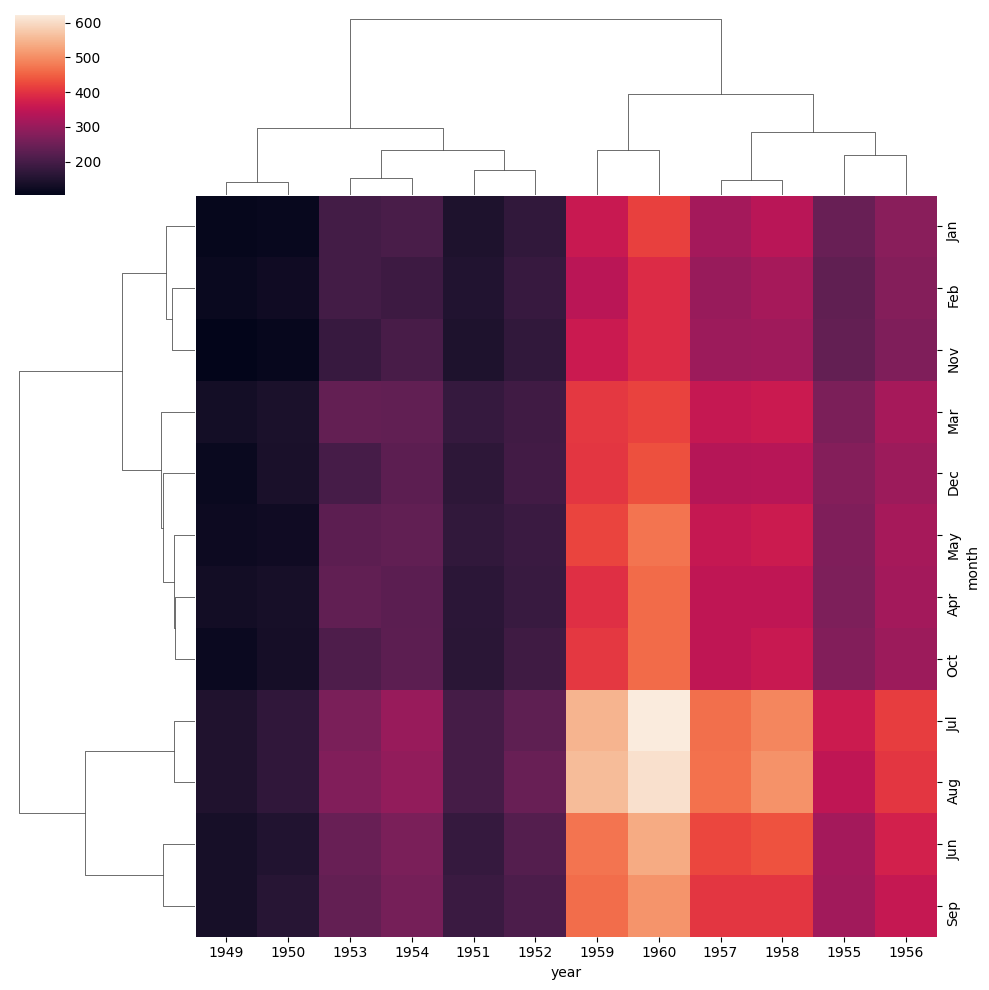

In [57]:
sns_prathamesh.clustermap(pvflights)

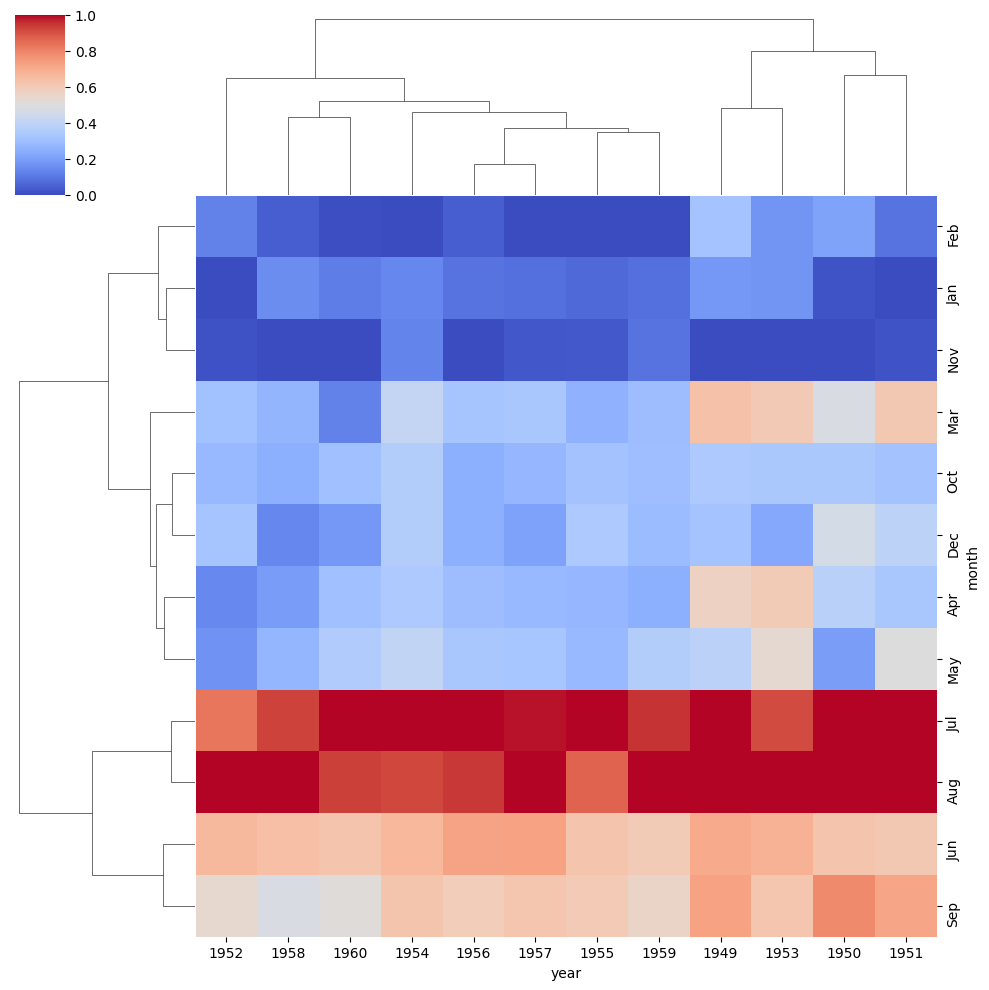

In [58]:
sns_prathamesh.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

## Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots seperated by features. Seaborn comes with a few built-in grids, such as the pairplot and jointplot, but you can also create your own grid types by using the `FacetGrid` class.

 - FacetGrid:
   - `facetgrid` is used to create a grid of subplots based on one or more categorical variables. It allows you to visualize and compare distributions or relationships across different levels of the categorical variable(s). Each subplot within the grid represents a specific combination of categorical levels, and you can plot various types of plots, such as histograms, bar plots, or point plots, within each subplot. `facetgrid` is particularly helpful for conducting in-depth exploratory analysis and uncovering insights based on categorical groupings.
 - PairGrid:
   - `pairgrid` creates a grid of subplots where each subplot represents the relationship between pairs of variables in a dataset. It enables you to plot different types of plots, such as scatter plots, histograms, or kernel density estimates, in each subplot. This function is useful for exploring pairwise relationships and identifying patterns or correlations between variables.


 - JointGrid:
   - `JointGrid` combines multiple plots, such as scatter plots, histograms, and regression plots, to provide a comprehensive analysis of the relationship between two variables. It consists of a central plot representing the joint distribution of the variables and additional marginal plots displaying the univariate distributions. `JointGrid` is useful for examining the overall distribution, assessing correlations, and understanding the relationship between two variables in a dataset.

In [60]:
iris = sns_prathamesh.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


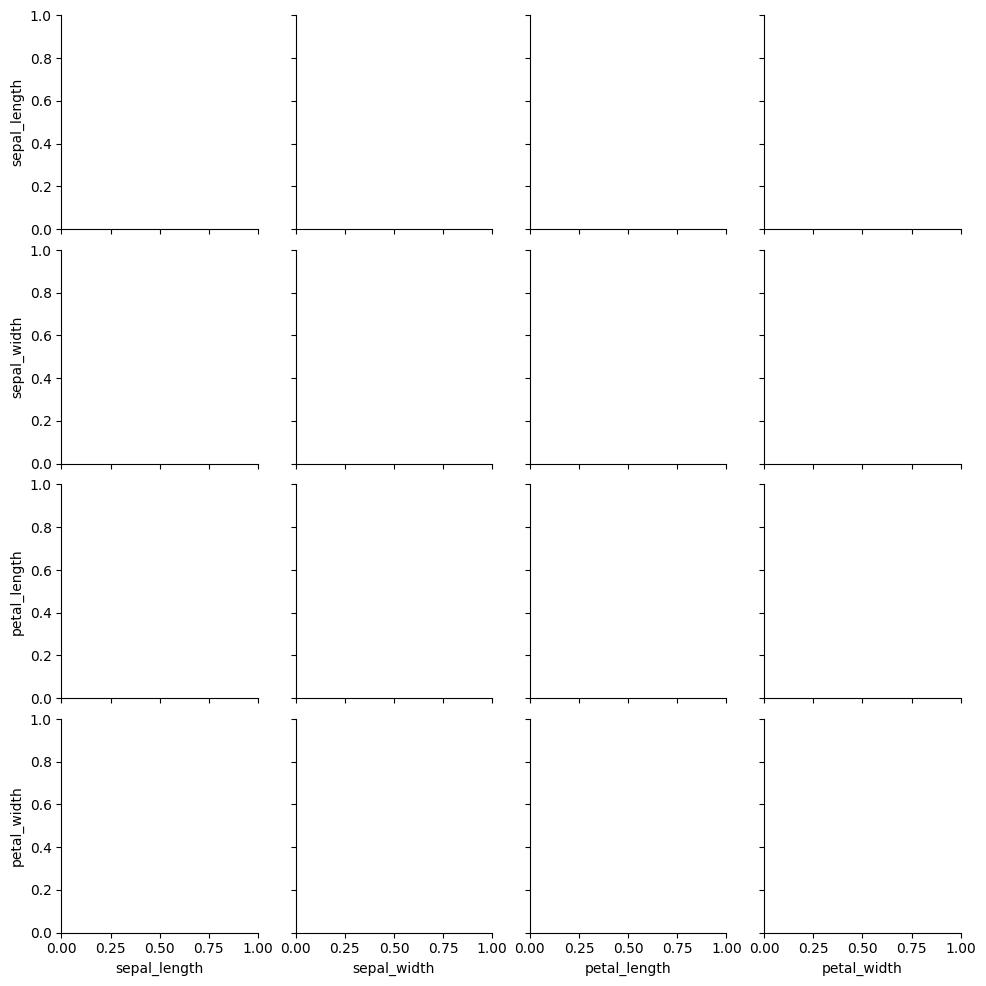

In [61]:
sns_prathamesh.PairGrid(iris)

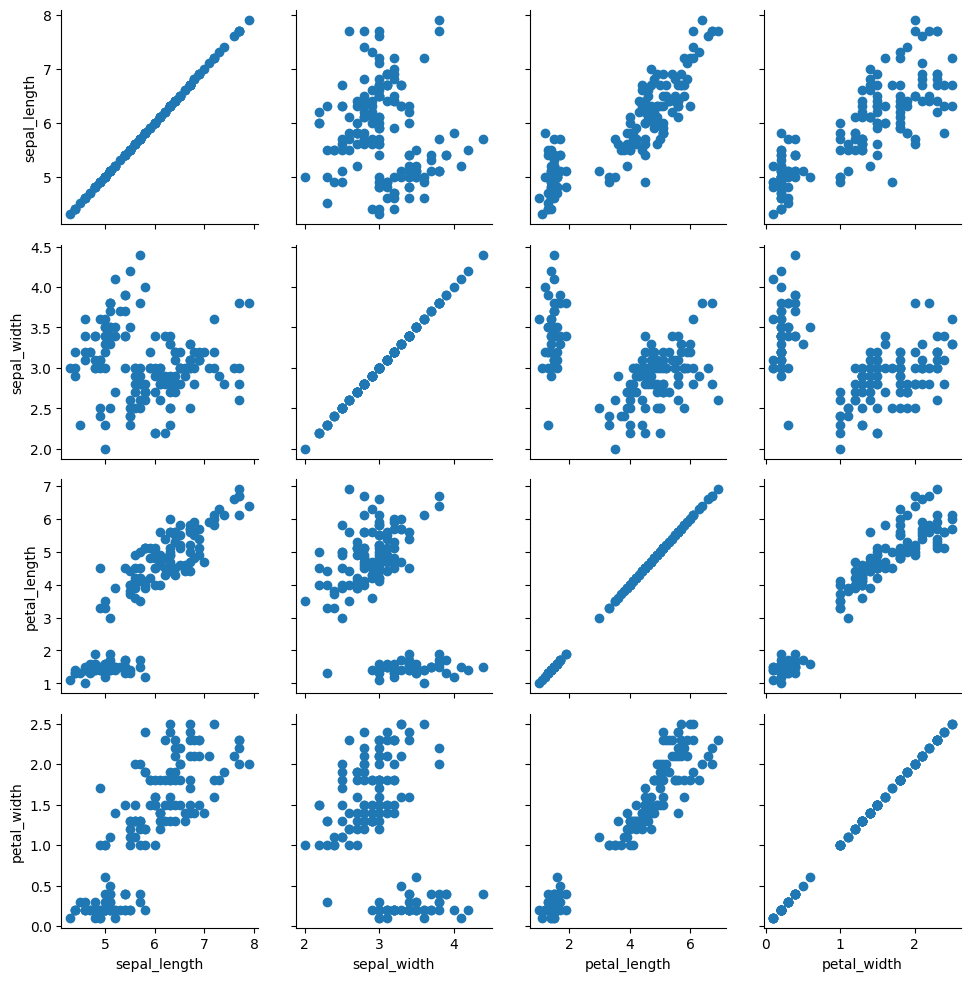

In [62]:
g = sns_prathamesh.PairGrid(iris)
g.map(plt.scatter)

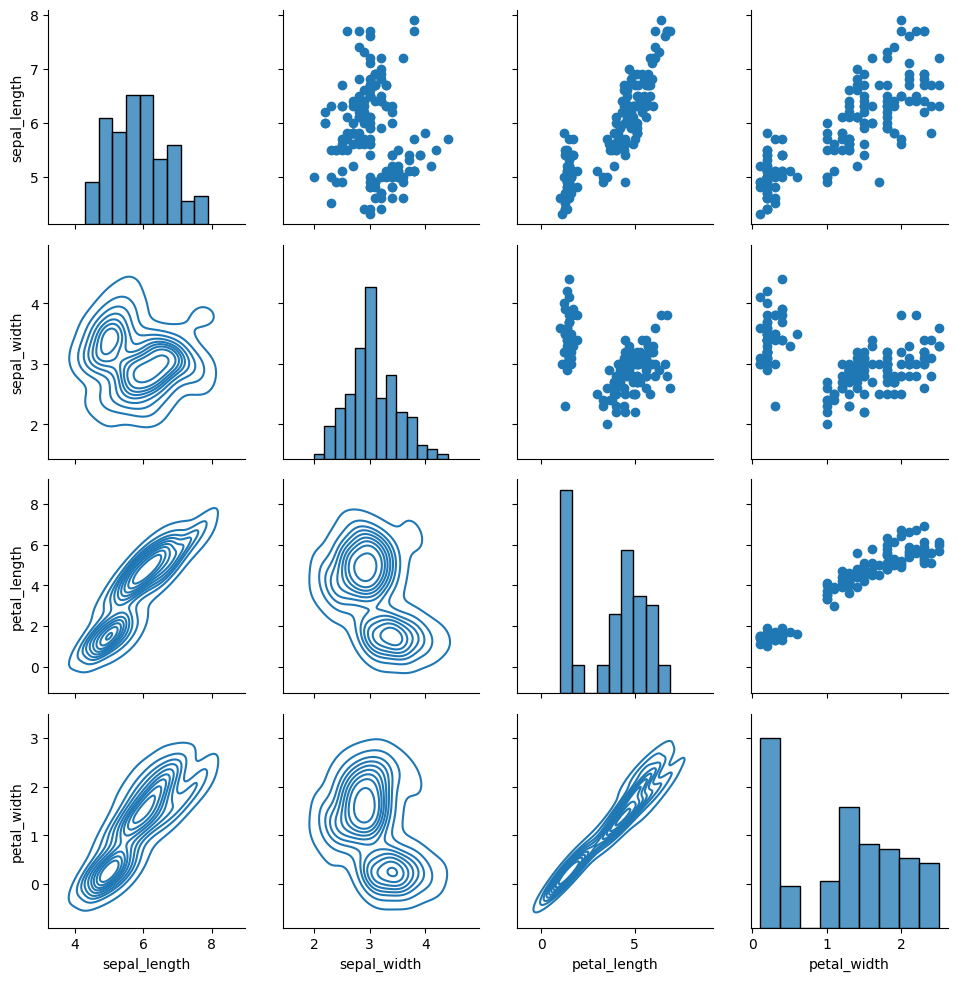

In [65]:
g = sns_prathamesh.PairGrid(iris)
g.map_diag(sns_prathamesh.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns_prathamesh.kdeplot)

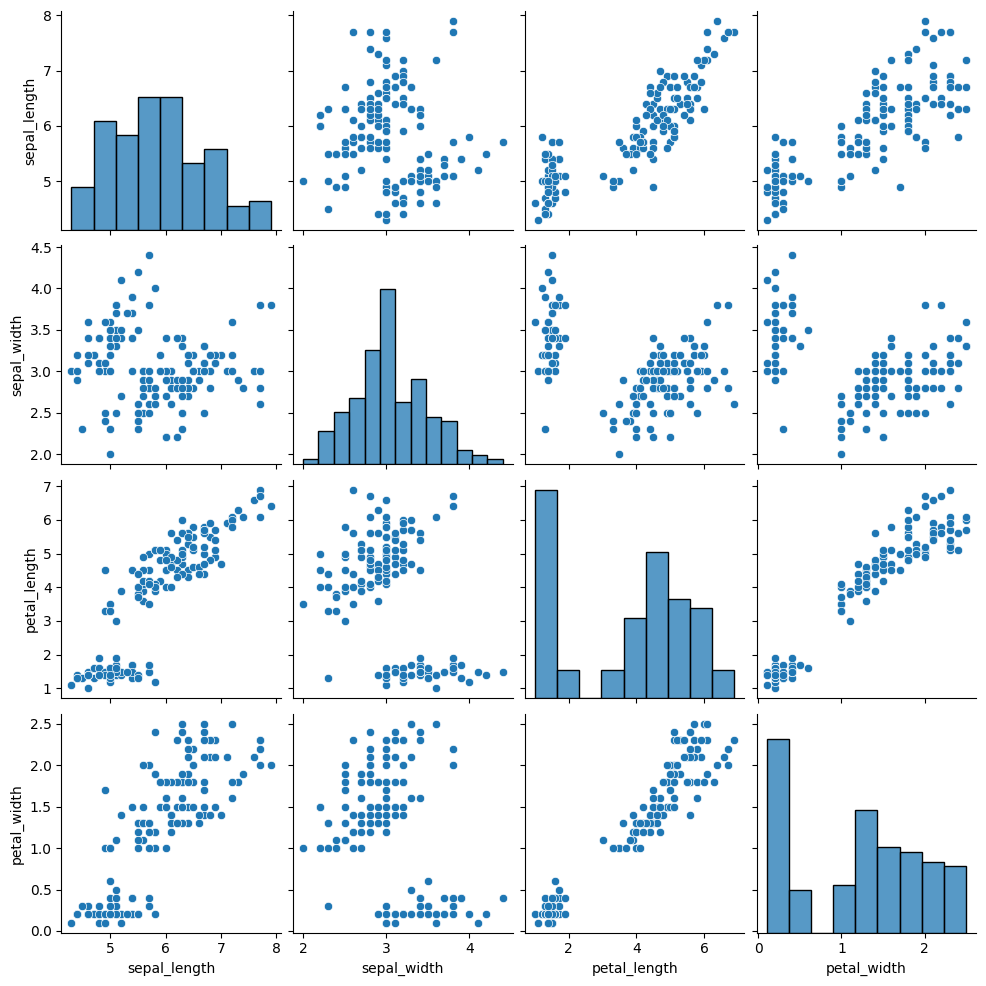

In [66]:
sns_prathamesh.pairplot(iris)

In [67]:
tips = sns_prathamesh.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


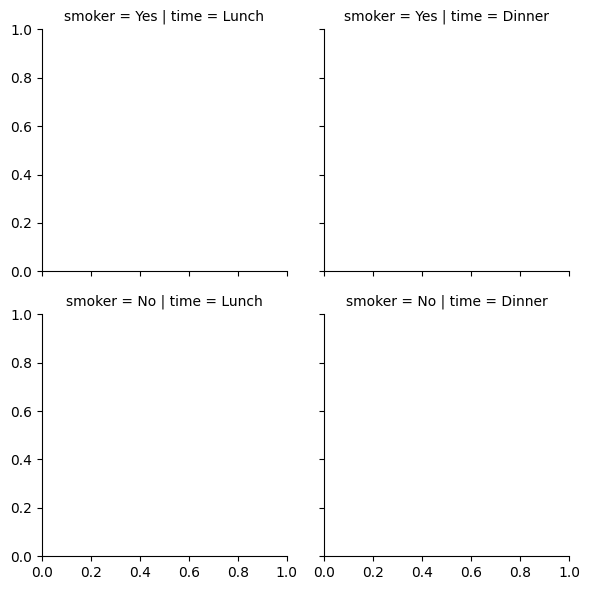

In [68]:
g = sns_prathamesh.FacetGrid(tips,col='time',row='smoker')


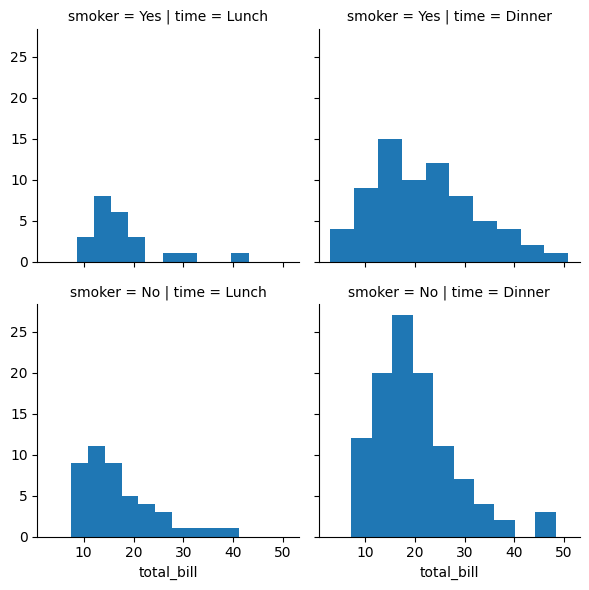

In [69]:
g = sns_prathamesh.FacetGrid(tips,col='time',row='smoker')
g = g.map(plt.hist,'total_bill')

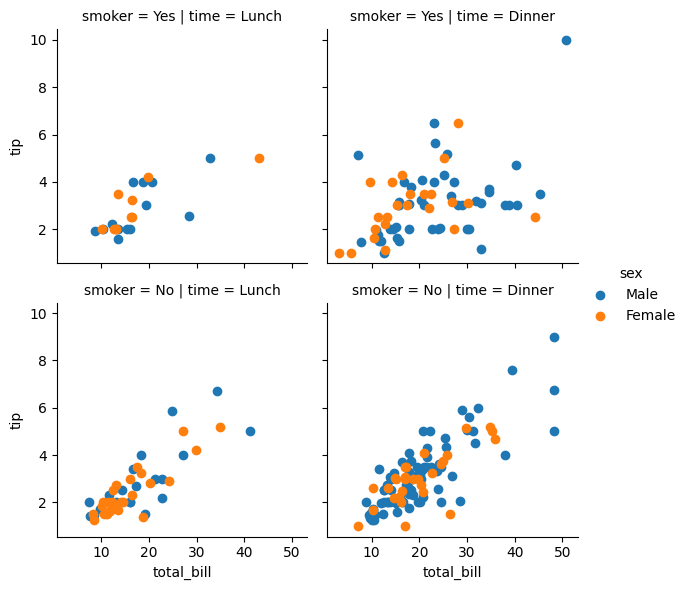

In [70]:
g = sns_prathamesh.FacetGrid(tips, col="time",  row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

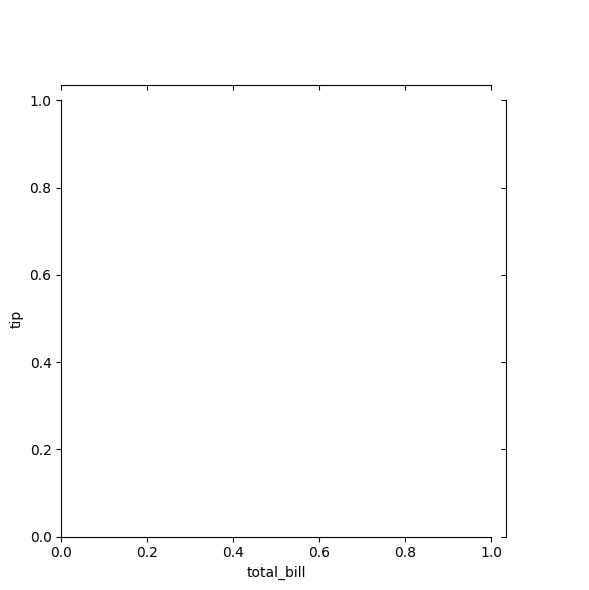

In [71]:
g = sns_prathamesh.JointGrid(x="total_bill", y="tip", data=tips)

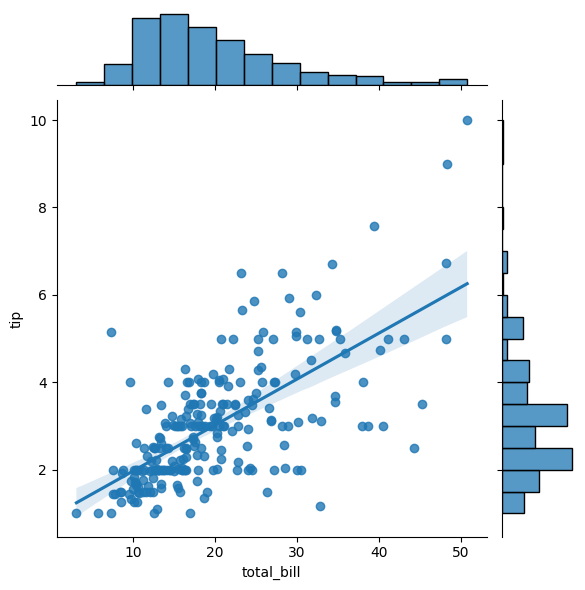

In [72]:
g = sns_prathamesh.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns_prathamesh.regplot, sns_prathamesh.histplot)

## Regression Plots

 - lmplot:
   - `lmplot` is a function in Seaborn that allows you to create a scatter plot with a linear regression line. It is a convenient way to visualize the relationship between two variables and assess the strength of the correlation. The function also supports additional parameters to customize the appearance of the plot, such as changing the color palette, adding a hue variable for further differentiation, and controlling the size and shape of the plot. `lmplot` is a widely used plot type for summarizing data and communicating insights.

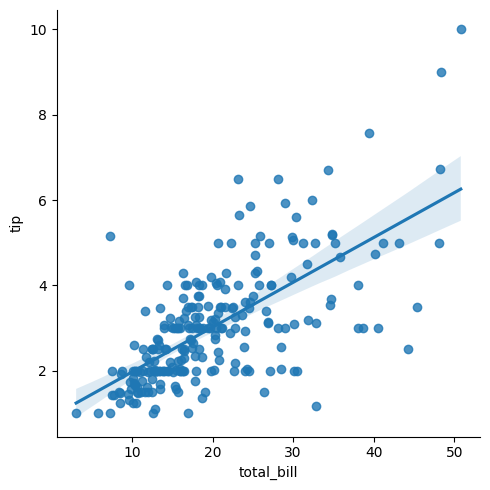

In [81]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips)

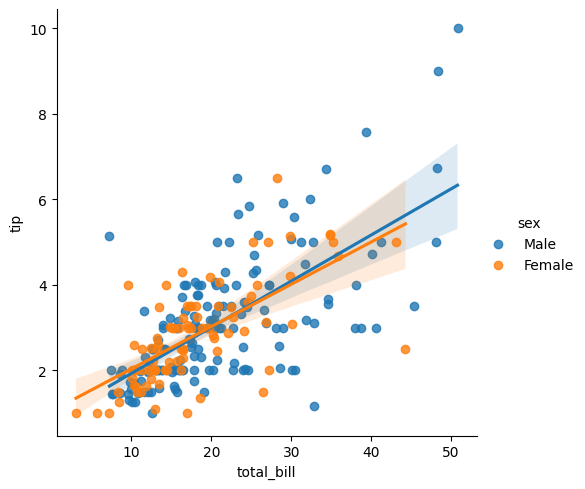

In [80]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

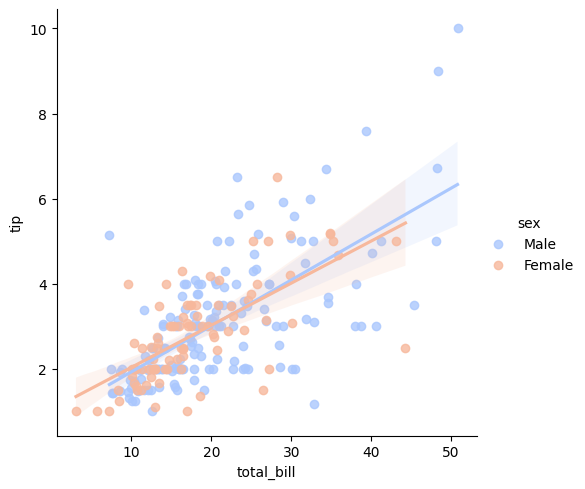

In [79]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

## Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

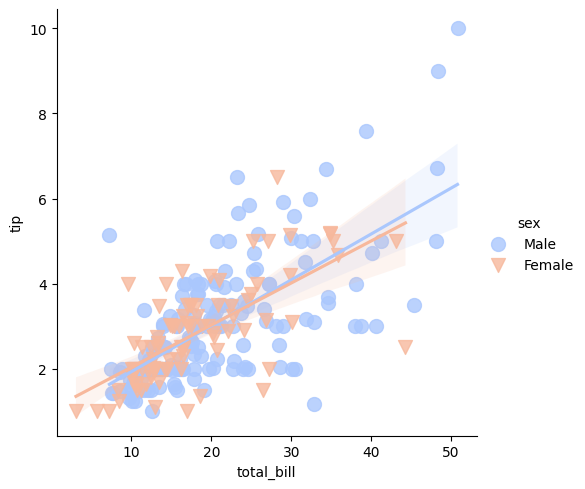

In [78]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})

Using a grid of subplots is also possible:
By combining lmplot with FacetGrid, you can create a grid of subplots where each subplot showcases the relationship between 'x' and 'y' for different categories in your dataset.

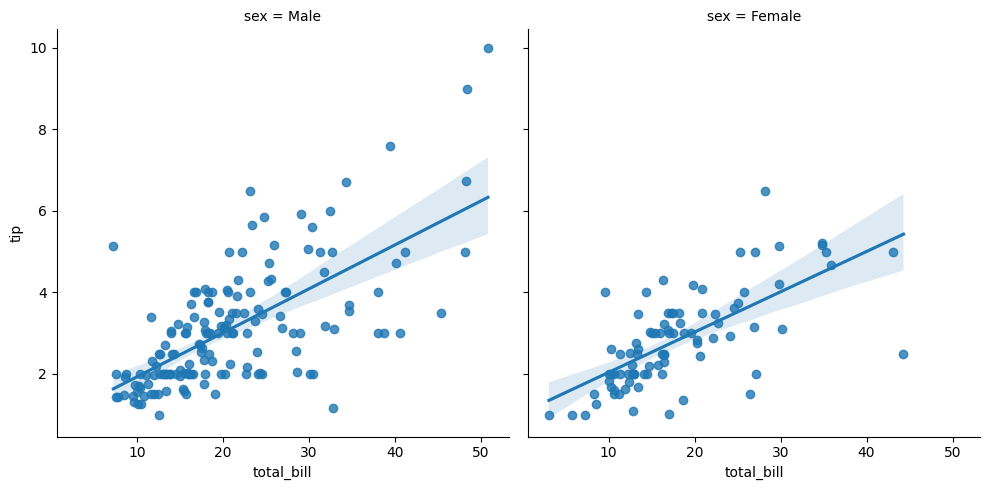

In [73]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,col='sex')

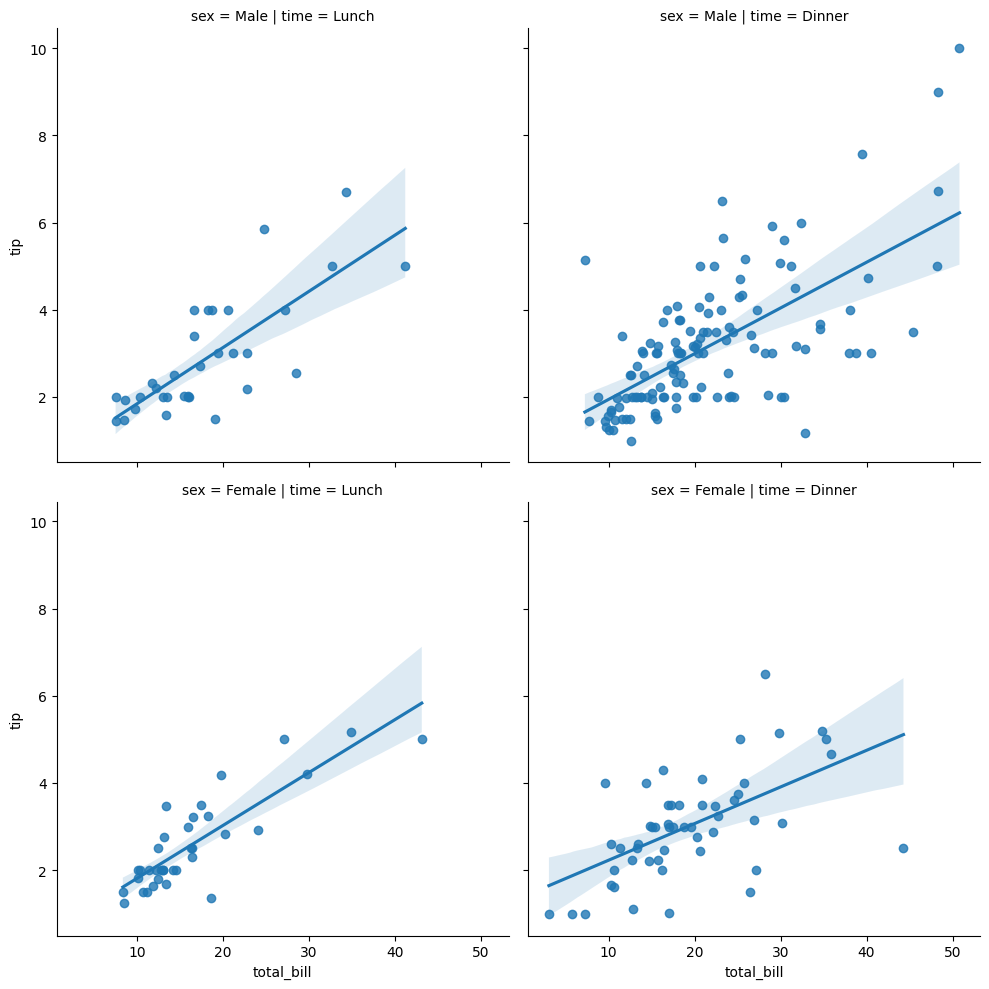

In [76]:
sns_prathamesh.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

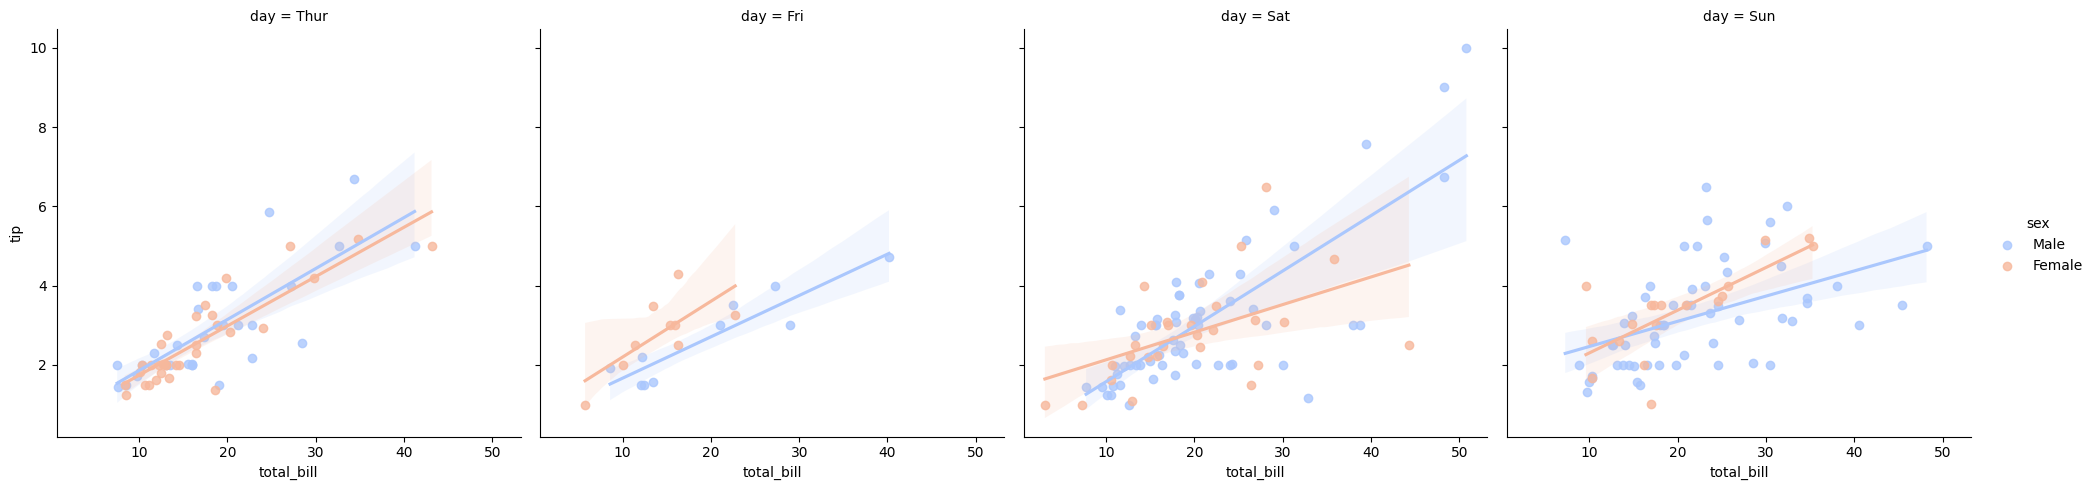

In [77]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

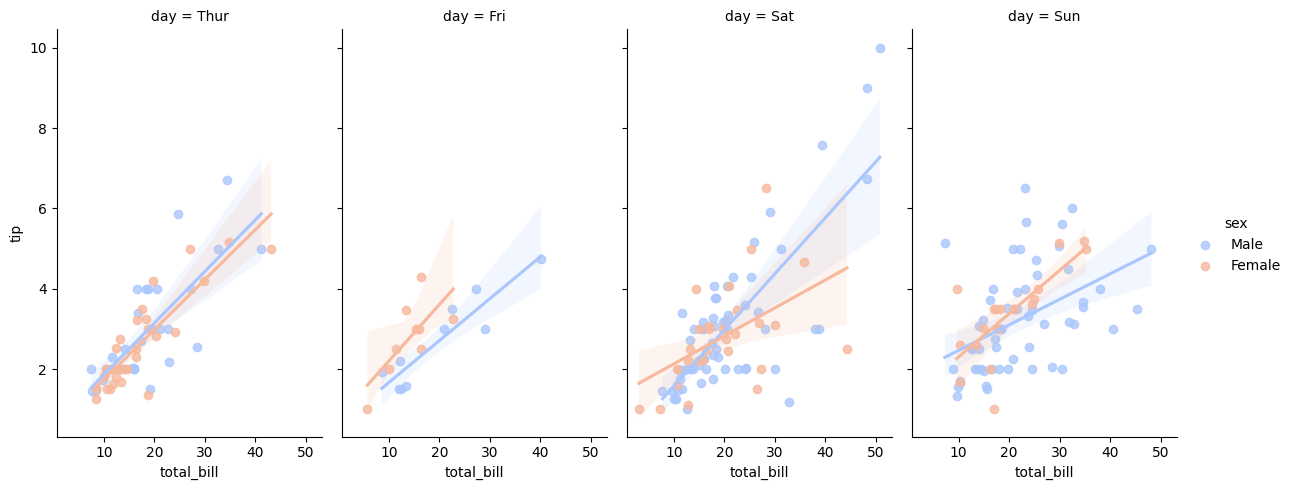

In [75]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm', aspect=0.6)

## Style and Color

In Seaborn's `countplot`, you can customize the style and color of the plot using various parameters and attributes. Here are a few ways to modify the style and color of a `countplot`:

1. Style:
   - Seaborn offers different predefined styles that can be applied to the plot using the `sns_prathamesh.set_style()` function. For example, you can use `sns_prathamesh.set_style('whitegrid')` to set a white background with grid lines or `sns_prathamesh.set_style('dark')` for a dark background.

2. Color Palette:
   - You can change the color palette of the `countplot` using the `palette` parameter. Seaborn provides several built-in color palettes, such as "deep," "muted," "pastel," "bright," and more. You can specify the palette using `sns_prathamesh.set_palette()` or by directly passing the palette name to the `palette` parameter of `countplot`.

3. Custom Colors:
   - If you prefer to use custom colors, you can pass a list of color values to the `color` parameter of `countplot`. For example, `sns_prathamesh.countplot(x='category', data=df, color=['red', 'blue', 'green'])` will assign the specified colors to the bars corresponding to each category.

<Axes: xlabel='sex', ylabel='count'>

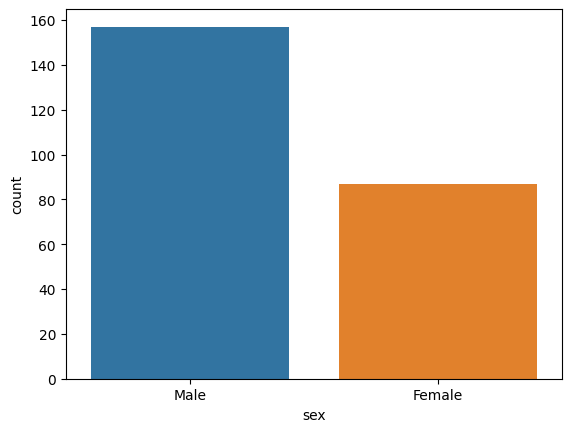

In [82]:
sns_prathamesh.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

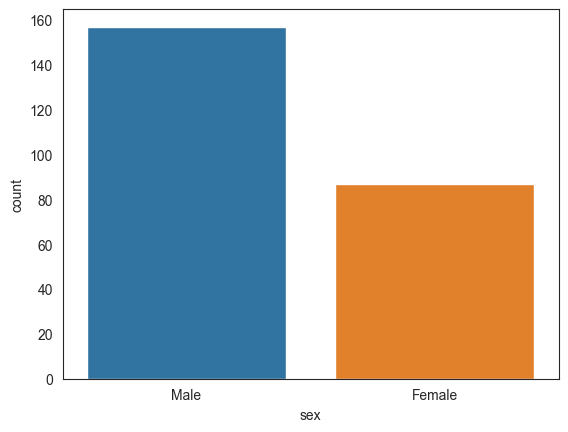

In [83]:
sns_prathamesh.set_style('white')
sns_prathamesh.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

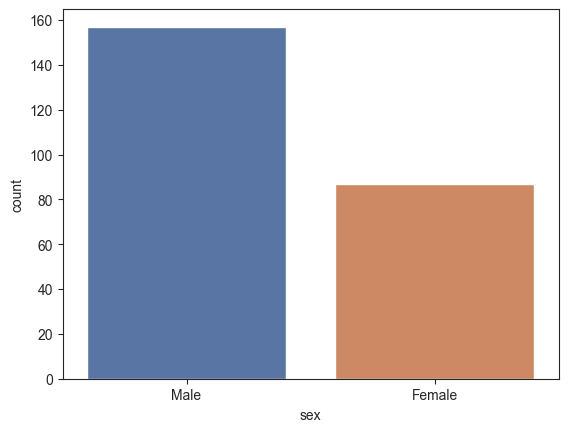

In [84]:
sns_prathamesh.set_style('ticks')
sns_prathamesh.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

`despine` is used to remove the spines (borders) from one or more sides of a plot. The spines typically include the top, right, bottom, and left borders of the plot. By using despine, you can enhance the visual clarity of your plots by eliminating unnecessary clutter.

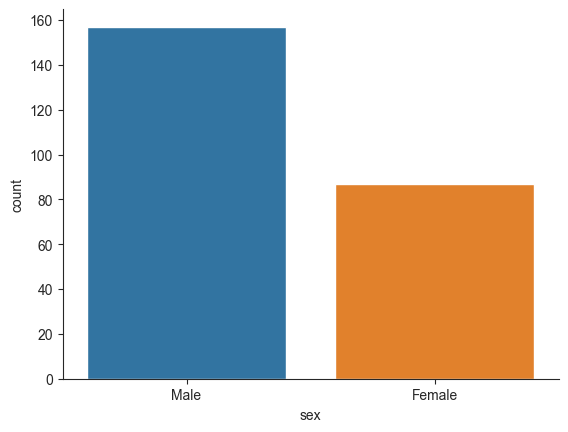

In [85]:
sns_prathamesh.countplot(x='sex',data=tips)
sns_prathamesh.despine()

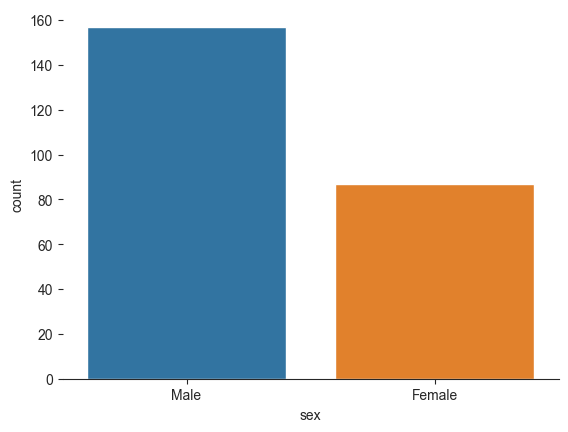

In [86]:
sns_prathamesh.countplot(x='sex',data=tips)
sns_prathamesh.despine(left=True)

## Size and Aspect

plt.figure figsize can be used to adjust the size of the plot. It accepts a tuple of the width and height of the figure in inches.

<Axes: xlabel='sex', ylabel='count'>

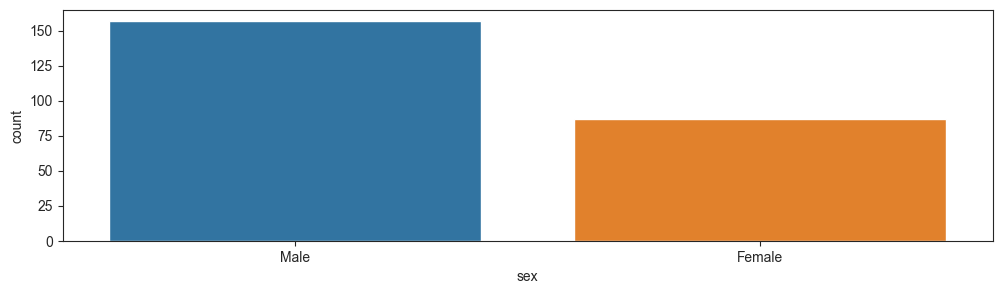

In [87]:
plt.figure(figsize=(12,3))
sns_prathamesh.countplot(x='sex',data=tips)

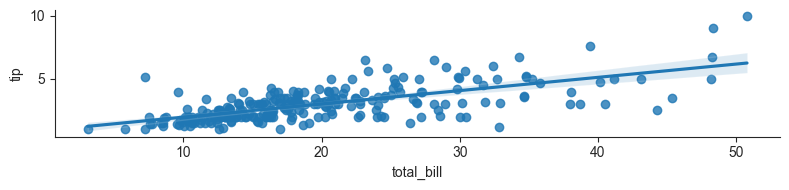

In [88]:
sns_prathamesh.lmplot(x='total_bill',y='tip',data=tips,height=2,aspect=4)

## Scale and Context

The `set_context()` function allows you to override the default parameters of the plot, such as the font scale, line width, and grid type. It is useful for adjusting the scale of the plot based on the context of the visualization. For example, you can use `set_context()` to create a plot that is optimized for display on a poster or presentation slide.

<Axes: xlabel='sex', ylabel='count'>

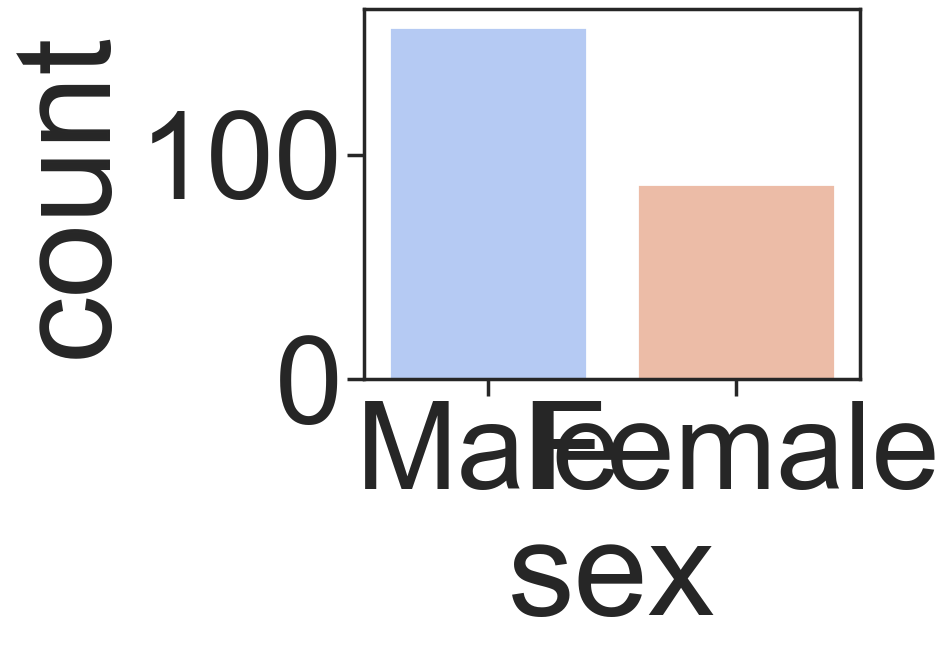

In [89]:
sns_prathamesh.set_context('poster',font_scale=4)
sns_prathamesh.countplot(x='sex',data=tips,palette='coolwarm')

## Seaborn Exercises

Time to practice your new seaborn skills! Try to recreate the plots below (don't worry about color schemes, just the plot itself.

## The Data

We will be working with a famous titanic data set for these exercises. Later on in the Machine Learning section of the course, we will revisit this data, and use it to predict survival rates of passengers. For now, we'll just focus on the visualization of the data with seaborn:

In [10]:
import seaborn as sns_prathamesh
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sns_prathamesh.set_style('whitegrid')

In [14]:
titanic = sns_prathamesh.load_dataset('titanic')

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exercises

** Recreate the plots below using the titanic dataframe. There are very few hints since most of the plots can be done with just one or two lines of code and a hint would basically give away the solution. Keep careful attention to the x and y labels for hints.**

** *Note! In order to not lose the plot image, make sure you don't code in the cell that is directly above the plot, there is an extra cell above that one which won't overwrite that plot!* **

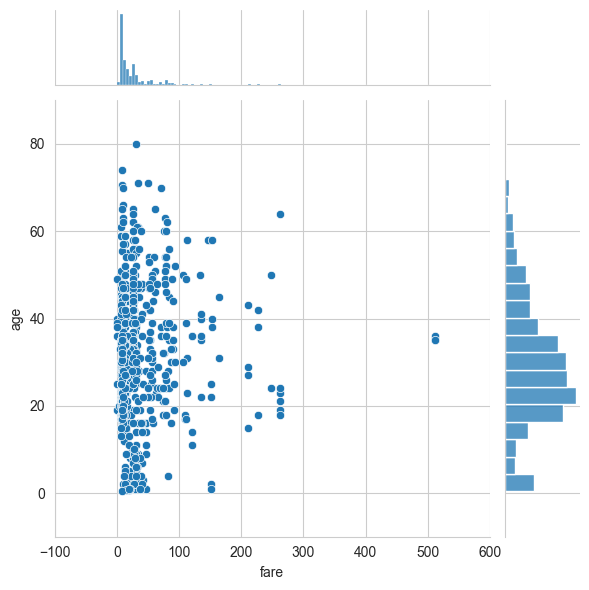

In [16]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns_prathamesh.jointplot(x='fare', y='age', data=titanic,kind='scatter',xlim=(-100,600),ylim=(-10,90))

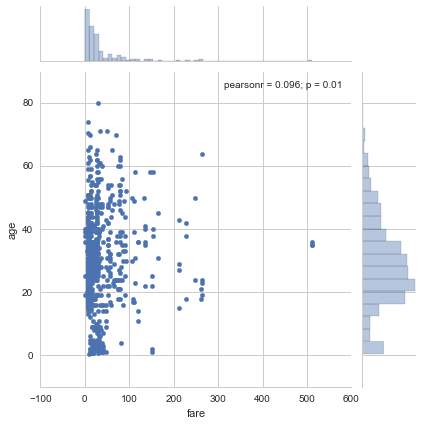

(0.0, 500.0)

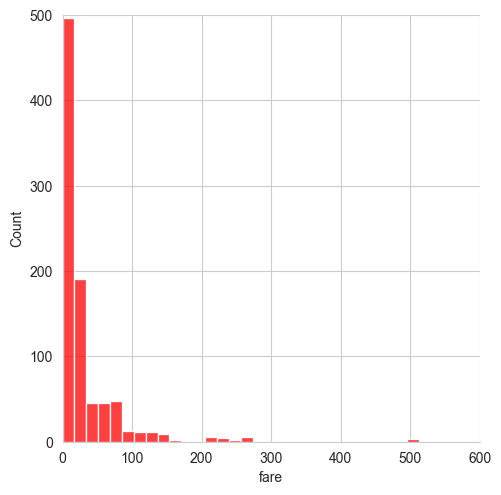

In [17]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns_prathamesh.displot(data = titanic, x='fare', bins=30, kde=False, color='red')
plt.xlim(0,600)
plt.ylim(0,500)

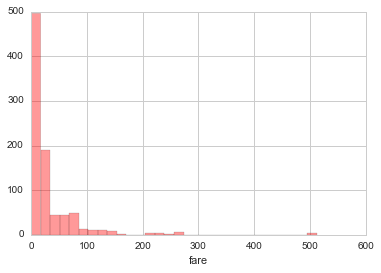

<Axes: xlabel='class', ylabel='age'>

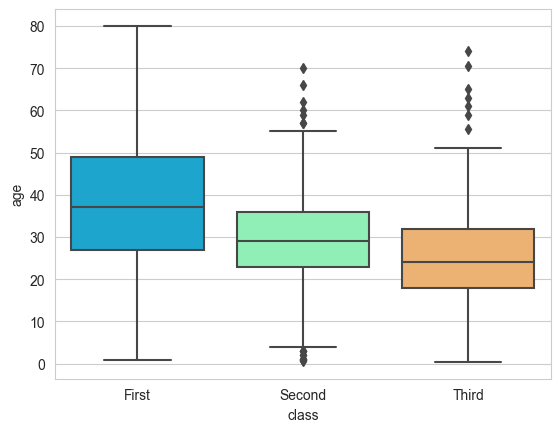

In [18]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!
sns_prathamesh.boxplot(x='class', y='age', data=titanic, palette='rainbow')

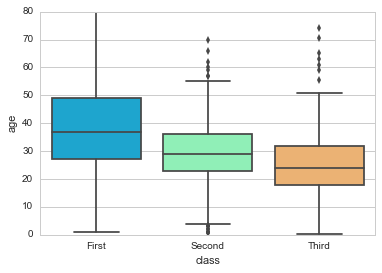

C:\Users\paxyi\AppData\Local\Temp\ipykernel_11248\1155423445.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns_prathamesh.swarmplot(x='class',y='age',data=titanic,palette='Set2')


<Axes: xlabel='class', ylabel='age'>

c:\Users\paxyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


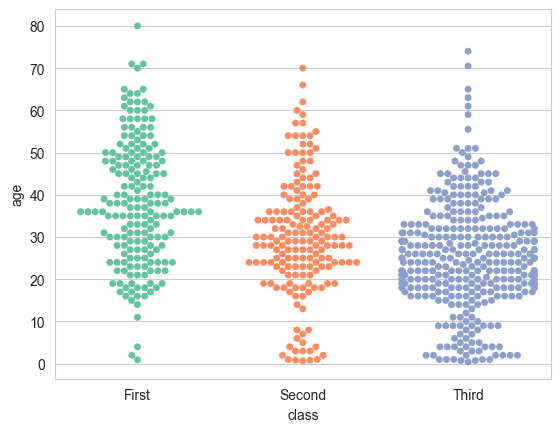

In [19]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns_prathamesh.swarmplot(x='class',y='age',data=titanic,palette='Set2')


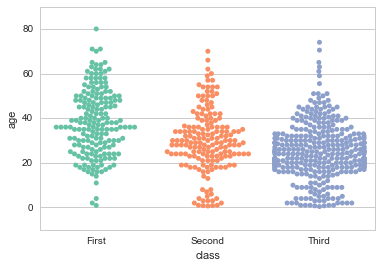

<Axes: xlabel='sex', ylabel='count'>

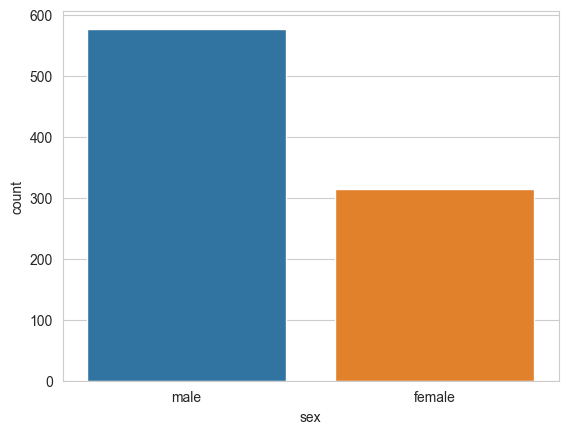

In [20]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!
sns_prathamesh.countplot(x='sex',data=titanic)


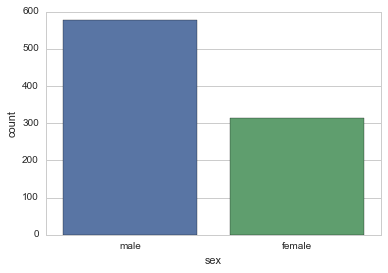

Text(0.5, 1.0, 'titanic.corr()')

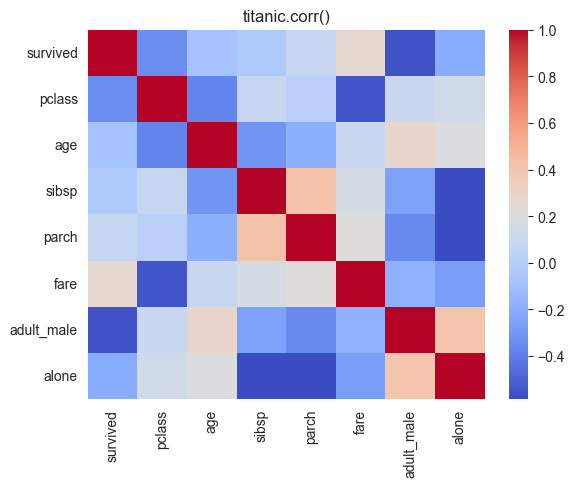

In [21]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!
sns_prathamesh.heatmap(titanic.corr(numeric_only=True),cmap='coolwarm')
plt.title('titanic.corr()')

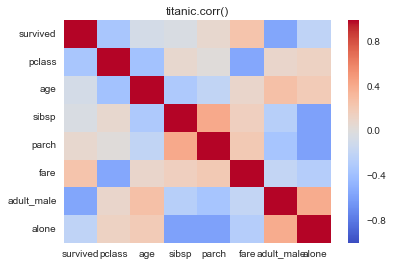

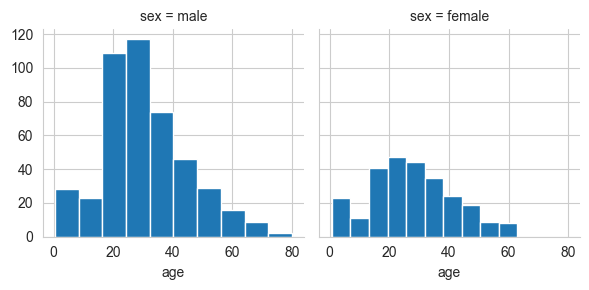

In [22]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!
g = sns_prathamesh.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')

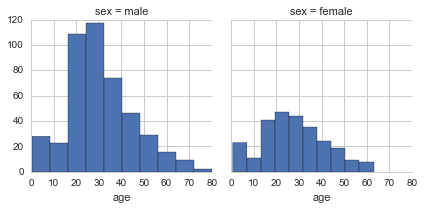

## Conclusion:

I have succesfully worked on Seaborn package